In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#패션 mnist 다운로드
from tensorflow import keras
(train_input,train_target),(test_input,test_target) = keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
print(train_input.shape,test_input.shape)
print(train_target.shape, test_target.shape)

(60000, 28, 28) (10000, 28, 28)
(60000,) (10000,)


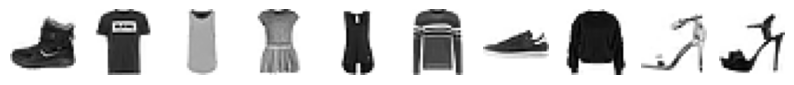

In [4]:
#훈련데이터의 첫 10개의 샘플 출력
fig,axs = plt.subplots(1,10,figsize=(10,10))
for i in range(10):
  axs[i].imshow(train_input[i], cmap='gray_r')
  axs[i].axis('off')
plt.show()

In [5]:
#훈련데이터의 첫 10개의 타깃 출력
targetList = [train_target[i] for i in range(10)]
print(np.array(targetList))

[9 0 0 3 0 2 7 2 5 5]


In [7]:
#레이블별 데이터 수 (통계 값)
print(np.unique(train_target,return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))


In [8]:
#데이터 정규화와 2차원으로 변경
train_scaled = train_input / 255.0
test_scaled = test_input/ 255.0
#train_scaled = train_scaled.reshape(-1,28*28) #input shape을 28*28로 주면 해결
#test_scaled = test_scaled.reshape(-1,28*28)
print(train_scaled.shape, test_scaled.shape)

(60000, 28, 28) (10000, 28, 28)


In [ ]:
#인공신경망 만들기 - 훈련세트에서 검증세트를 20% 지정하기 (자동 분류 말고 좋은 품질의 데이터를 위해) - 이거 쓰지 않기
from sklearn.model_selection import train_test_split
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled,train_target, test_size=0.2,random_state=42)
print(train_scaled.shape, train_target.shape)
print(val_scaled.shape, val_target.shape)

(48000, 784) (48000,)
(12000, 784) (12000,)


In [17]:
#모델의 네트워크 구성
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28))) #2차원 데이터를 1차원으로 변경 (한 층씩 끊어서 정의), 입력층(1층) - 여기에는 activation 주면 안 됨
#model.add(keras.layers.Dense(100,activation='sigmoid')) #은닉층 - 노드 수 100개, 시그모이드: 0~1 사이 -> 기울기 소실: 층이 깊어지면 학습이 제대로 안 됨 -> relu 사용#
model.add(keras.layers.Dense(100,activation='relu')) #위, 아래랑 바꿔서 테스트#
#model.add(keras.layers.Dropout(0.1)) #10% 드롭아웃 (비울 작게 줘야함) #일부를 랜덤하게 아웃, : 다 연결되는데 이러면 과대적합 일어남#
model.add(keras.layers.Dense(10,activation='softmax')) #출력층 - activation은 은닉층과 출력층에만!
model.summary() #모델의 각 레이어별 정보 확인

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
#모델의 학습방법 정의 및 훈련
#categorical_crossentropy:다중분류를 위한 손실함수(타깃을 one-hot-coding으로)
#성능지표: 'accuracy'
rmsprop = keras.optimizers.RMSprop(learning_rate=0.01)
adagrad = keras.optimizers.Adagrad() #적응적 학습률 + 모멘텀
sgd = keras.optimizers.SGD(momentum=0.9, nesterov=True) #네스테로프 모멘템 최적화
model.compile(loss='sparse_categorical_crossentropy',metrics=['accuracy']) #대괄호 주의
#model.compile(optimizer=sgd,loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history = model.fit(train_scaled, train_target, validation_split=0.2, batch_size=16 ,epochs=10,verbose=1) #train_test_split 대신 validation_split=0.2로 간단하게
#history에 저장 -> 분석 가능 (epoch 알아보기)
#batch_size: 전체 데이터를 16개 조각으로 나눔 (사이즈에 따라 성능 바뀜 - default=32) 48000/16=3000

Epoch 1/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7734 - loss: 0.6443 - val_accuracy: 0.8411 - val_loss: 0.4467
Epoch 2/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8580 - loss: 0.3974 - val_accuracy: 0.8656 - val_loss: 0.4017
Epoch 3/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8712 - loss: 0.3689 - val_accuracy: 0.8734 - val_loss: 0.3702
Epoch 4/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8790 - loss: 0.3521 - val_accuracy: 0.8673 - val_loss: 0.4010
Epoch 5/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8812 - loss: 0.3466 - val_accuracy: 0.8726 - val_loss: 0.4077
Epoch 6/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8859 - loss: 0.3347 - val_accuracy: 0.8765 - val_loss: 0.4115
Epoch 7/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8926 - loss: 0.3210 - val_accuracy: 0.8772 - val_loss: 0.4178
Epoch 8/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8954 - loss: 0.3162 

In [15]:
print(history.history) #키:딕셔너리

{'accuracy': [0.815458357334137, 0.8557916879653931, 0.8676458597183228, 0.874625027179718, 0.8810208439826965, 0.8850833177566528, 0.8888333439826965, 0.8913958072662354, 0.8969374895095825, 0.8998958468437195], 'loss': [0.5321682691574097, 0.40099266171455383, 0.3677525222301483, 0.3471267521381378, 0.33094343543052673, 0.31710511445999146, 0.30663689970970154, 0.2978496551513672, 0.2878813147544861, 0.27913305163383484], 'val_accuracy': [0.8463333249092102, 0.8613333106040955, 0.8683333396911621, 0.871833324432373, 0.8738333582878113, 0.8784999847412109, 0.8810833096504211, 0.8799166679382324, 0.8794999718666077, 0.8790000081062317], 'val_loss': [0.41934749484062195, 0.380018949508667, 0.3674665093421936, 0.3566092848777771, 0.35075947642326355, 0.34109315276145935, 0.33186811208724976, 0.3391557037830353, 0.34709158539772034, 0.34783053398132324]}


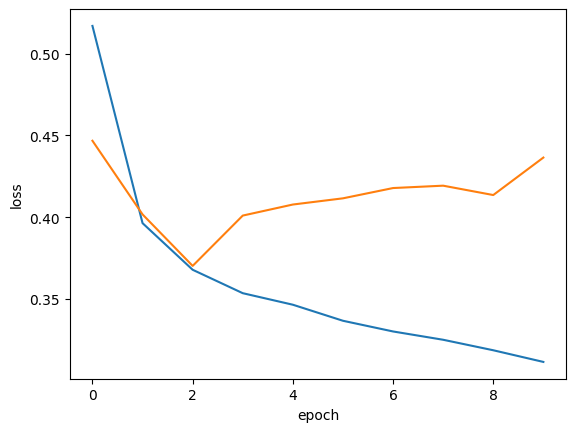

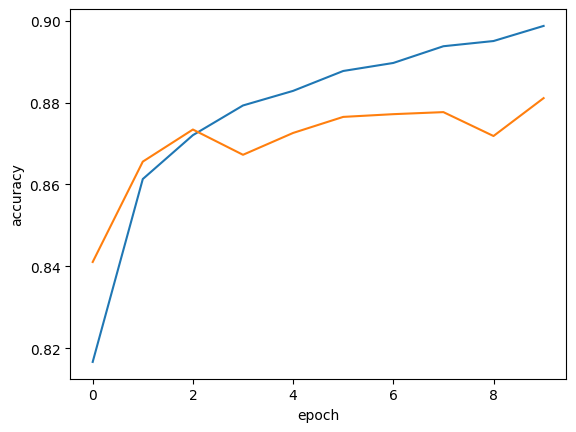

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [ ]:
#검증데이터로 모델평가
print(model.evaluate(val_scaled,val_target))
#테스트데이터로 모델평가
print(model.evaluate(test_scaled,test_target))

375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8534 - loss: 0.4317
[0.43809932470321655, 0.8524166941642761]
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8468 - loss: 0.4524
[0.46753057837486267, 0.8416000008583069]
